# Problema de negócio e informações sobre a base de dados

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

- This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

## Informações sobre as bases de dados


Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user




## Importação das bibliotecas que serão usadas e da base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
credito = pd.read_csv('credito.csv')

In [3]:
print(f'O banco de dados têm:\n\n{credito.shape[0]} linhas\n{credito.shape[1]} colunas')


O banco de dados têm:

8950 linhas
18 colunas


In [4]:
# !pip install dataprep
# from dataprep.eda import create_report
# relatorio = create_report(credito, title='Relatório')
# relatorio
# Relatorio.show_browser()

In [5]:
credito.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
# Traduzindo o nome das colunas para português para facilitar o entendimento dos dados

credito.columns = ['ID_cliente','Saldo','Freq_atualiza_saldo','Valor_compras_total', 'Valor_compras_vista', 'Valor_compras_prazo',
                          'Saque_limite', 'Freq_compras', 'Freq_compras_vista', 'Freq_compras_prazo', 'Freq_saque', 'Qtd_saques', 'Qtd_compras',
                          'Limite_cartao', 'Divida_total_cartao', 'Parcela_minima_cartao', 'Parcela_total_cartao', 'Cliente_anos']

In [7]:
credito.drop('ID_cliente', axis=1, inplace=True)

In [8]:
credito.head(3)

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [9]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Saldo                  8950 non-null   float64
 1   Freq_atualiza_saldo    8950 non-null   float64
 2   Valor_compras_total    8950 non-null   float64
 3   Valor_compras_vista    8950 non-null   float64
 4   Valor_compras_prazo    8950 non-null   float64
 5   Saque_limite           8950 non-null   float64
 6   Freq_compras           8950 non-null   float64
 7   Freq_compras_vista     8950 non-null   float64
 8   Freq_compras_prazo     8950 non-null   float64
 9   Freq_saque             8950 non-null   float64
 10  Qtd_saques             8950 non-null   int64  
 11  Qtd_compras            8950 non-null   int64  
 12  Limite_cartao          8949 non-null   float64
 13  Divida_total_cartao    8950 non-null   float64
 14  Parcela_minima_cartao  8637 non-null   float64
 15  Parc

In [10]:
# A coluna 'Limite_cartao' tem um valor nulo. Podemos remover essa única linha do dataset sem ter prejuízo de informações

credito.dropna(subset=['Limite_cartao'], inplace=True)

In [11]:
# A coluna 'Parcela_minima_cartao' também parece ter valores nulos
credito.isnull().sum()

Saldo                      0
Freq_atualiza_saldo        0
Valor_compras_total        0
Valor_compras_vista        0
Valor_compras_prazo        0
Saque_limite               0
Freq_compras               0
Freq_compras_vista         0
Freq_compras_prazo         0
Freq_saque                 0
Qtd_saques                 0
Qtd_compras                0
Limite_cartao              0
Divida_total_cartao        0
Parcela_minima_cartao    313
Parcela_total_cartao       0
Cliente_anos               0
dtype: int64

In [12]:
# Análise estatística da coluna 'Parcela_minima_cartao' para decidir com que valor preencher os valores vazios. 
# Ou se o melhor seria apenas deletar as linhas, mas todas as demais informações desses 313 clientes seriam perdidas 

In [13]:
credito['Parcela_minima_cartao'].describe()[1:]

mean      864.304943
std      2372.566350
min         0.019163
25%       169.163545
50%       312.452292
75%       825.496463
max     76406.207520
Name: Parcela_minima_cartao, dtype: float64

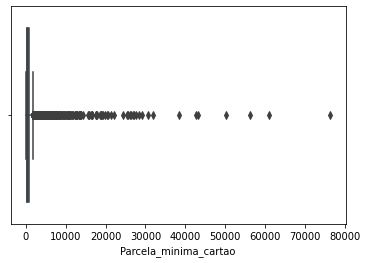

In [14]:
# O valor máximo de pagamento da parcela mínima do cartão é 76406, quase 100x maior do que o valor do 3º quartil
# Um gráfico boxplot pode dar um insight sobre a distribuição e quantidade de outliers
sns.boxplot(x = credito['Parcela_minima_cartao']);

In [15]:
# A média (864) é próxima do 3ª quartil. Nesse caso será melhor substituir os valores nulos pela mediana (312)

credito['Parcela_minima_cartao'] = credito['Parcela_minima_cartao'].fillna(credito['Parcela_minima_cartao'].median())

In [16]:
# Todos os valores ausentes foram preenchidos com a mediana da coluna
credito['Parcela_minima_cartao'].isnull().sum()

0

In [17]:
valor_max_vista = credito['Valor_compras_vista'].max()

In [18]:
cliente_valor_max_vista = credito[credito['Valor_compras_vista'] == valor_max_vista]

In [19]:
# Informações sobre o cliente que pagou o maior valor de compras à vista - interessante

cliente_valor_max_vista

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


# Defenição do número de clusteres usando o Elbow Method

##K-Means: Inertia - mede o quão bem o kmeans dividiu (clusterizou) o dataset

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

**A good model **is one with *low inertia* AND a *low number of clusters (K)*. However, this is a tradeoff because as K increases, inertia decreases.

T*o find the optimal K for a dataset, use the Elbow method;* find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.



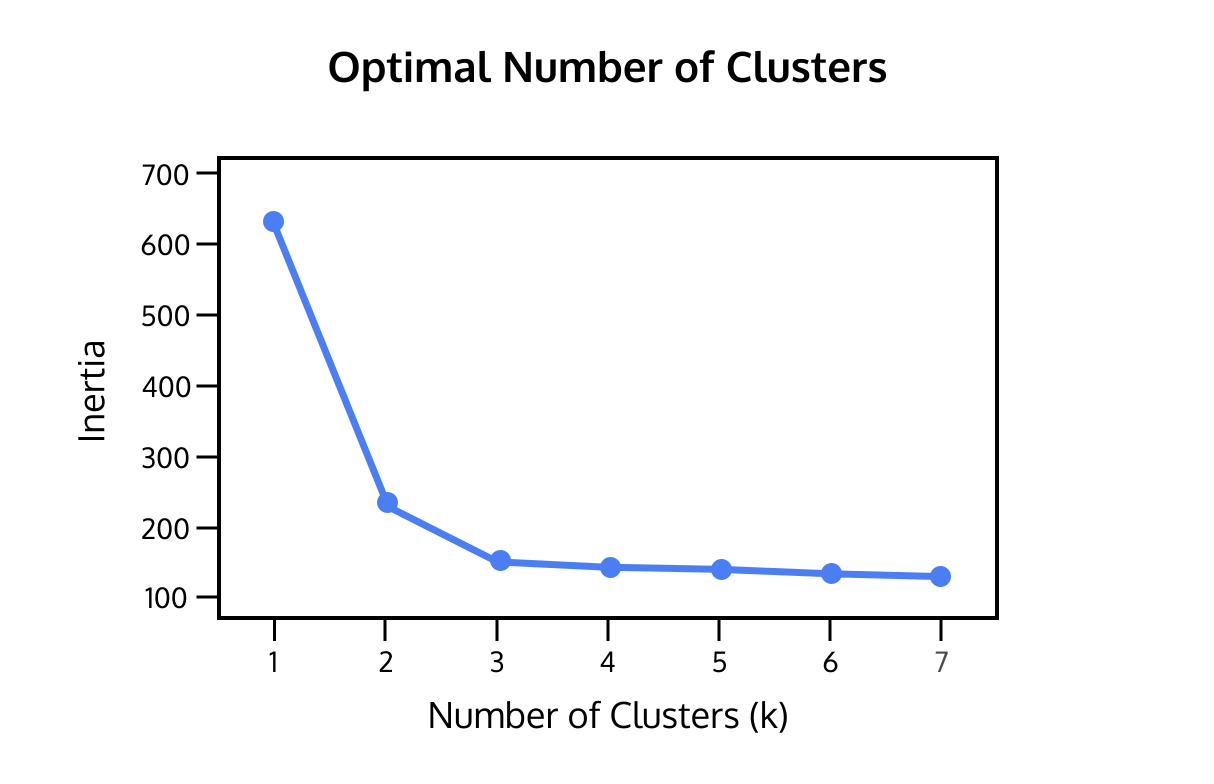

In [20]:
min(credito['Saldo']), max(credito['Saldo'])

(0.0, 19043.13856)

In [21]:
scaler = StandardScaler()
credito_padronizado = scaler.fit_transform(credito)

In [22]:
credito_padronizado

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.30242676,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.0974534 ,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.09333029,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.32690037,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33832999,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.3243838 ,
        -0.52558844, -4.12691899]])

In [23]:
credito = pd.DataFrame(credito_padronizado, columns=credito.columns)

In [24]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(credito)
  wcss_1.append(kmeans.inertia_)

In [25]:
for i,j in enumerate(wcss_1):
  print(f'k = {i+1}\ninertia = {j}')

k = 1
inertia = 152132.9999999998
k = 2
inertia = 127772.7345151713
k = 3
inertia = 111962.333922628
k = 4
inertia = 99054.0562729727
k = 5
inertia = 91482.82038277047
k = 6
inertia = 84819.71598903765
k = 7
inertia = 79495.83246594059
k = 8
inertia = 74453.38021666961
k = 9
inertia = 69924.39780638096
k = 10
inertia = 66452.51867643325
k = 11
inertia = 63606.6810989043
k = 12
inertia = 61346.83189473241
k = 13
inertia = 59565.91060728283
k = 14
inertia = 57468.239455435236
k = 15
inertia = 55873.05394637895
k = 16
inertia = 54741.66301883715
k = 17
inertia = 53130.64966284038
k = 18
inertia = 52024.161481020645
k = 19
inertia = 50605.39648836528


Text(0, 0.5, 'WCSS')

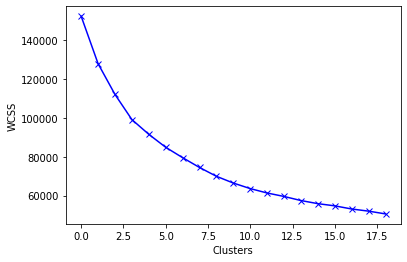

In [26]:
plt.plot(wcss_1, 'bx-', color='blue')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

## Agrupamento com k-means

In [28]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(credito_padronizado)
labels = kmeans.labels_

In [29]:
labels, len(labels)

(array([1, 6, 2, ..., 0, 0, 0], dtype=int32), 8949)

In [30]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 621, 2721, 1090,  418, 2026,   30,  864, 1179]))

In [ ]:
kmeans.cluster_centers_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credito.columns])
cluster_centers

- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [33]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credito.columns])
cluster_centers

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos
0,866.379288,0.796063,385.801981,234.354750,151.930322,1123.570918,0.409504,0.116532,0.275639,0.196960,3.259259,5.070853,2427.568438,597.319614,341.846749,0.158067,7.231884
1,1605.425806,0.972781,230.752231,182.854340,48.079765,792.782461,0.142200,0.080062,0.062877,0.157643,3.099596,2.614847,3389.091020,1011.224791,844.968783,0.020063,11.881294
2,1203.542722,0.969708,2014.054679,1623.362257,390.692422,265.349358,0.869232,0.767218,0.394698,0.050823,0.965138,27.883486,5867.410342,2015.958243,470.845926,0.278998,11.869725
3,3500.201434,0.987968,5810.981818,3425.831986,2386.585239,577.531077,0.956027,0.664695,0.864141,0.073742,1.830144,84.114833,8977.153110,5442.702336,2195.115961,0.232777,11.964115
4,809.633991,0.956516,924.904067,191.376431,733.968544,218.809717,0.887553,0.089105,0.842861,0.040938,0.808490,19.393386,3555.834256,1109.480969,753.852366,0.244381,11.861797
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,5081.019213,0.970308,542.339225,336.534907,205.921991,5228.690548,0.301090,0.141207,0.201313,0.520797,16.490741,8.179398,8256.486742,4125.490558,2054.145419,0.039427,11.611111
7,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,180.974820,0.235839,11.783715


In [34]:
labels, len(labels)

(array([1, 6, 2, ..., 0, 0, 0], dtype=int32), 8949)

In [ ]:
credito_cluster = pd.concat([credito, pd.DataFrame({'cluster': labels})], axis = 1)
credito_cluster.head()

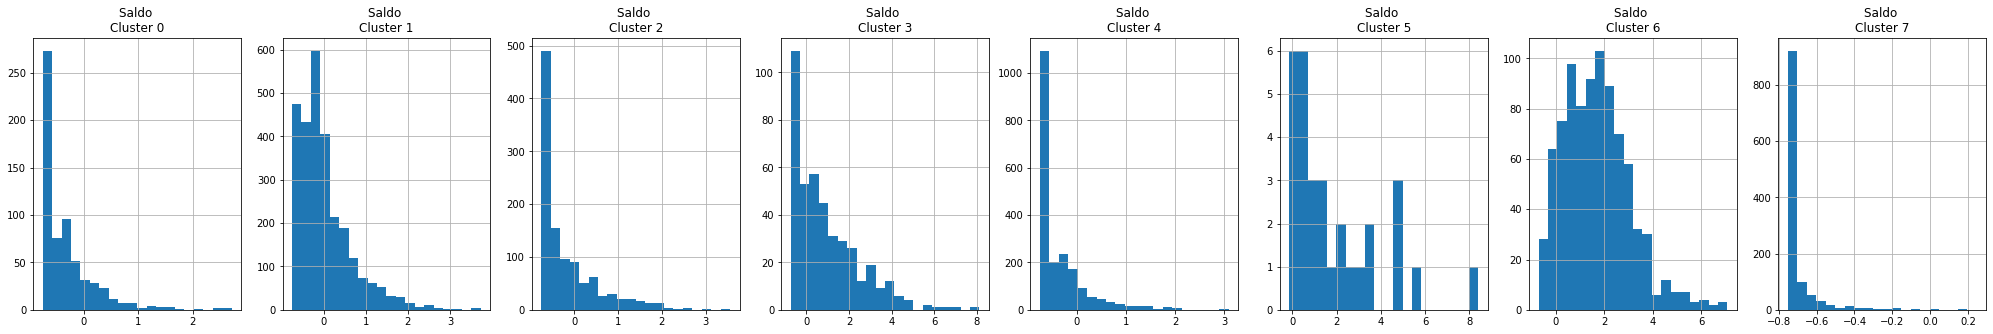

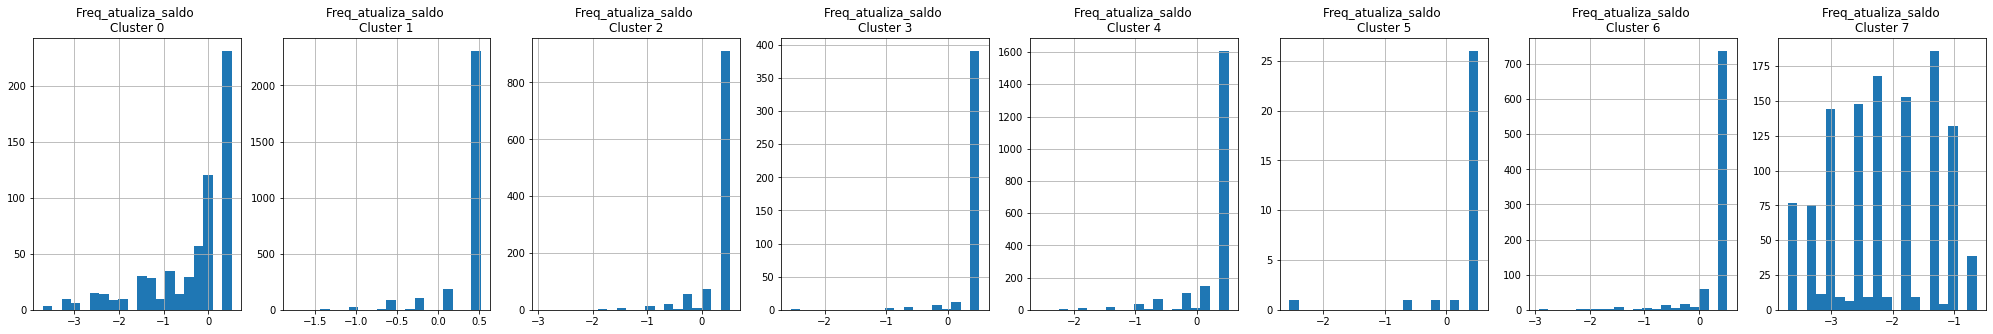

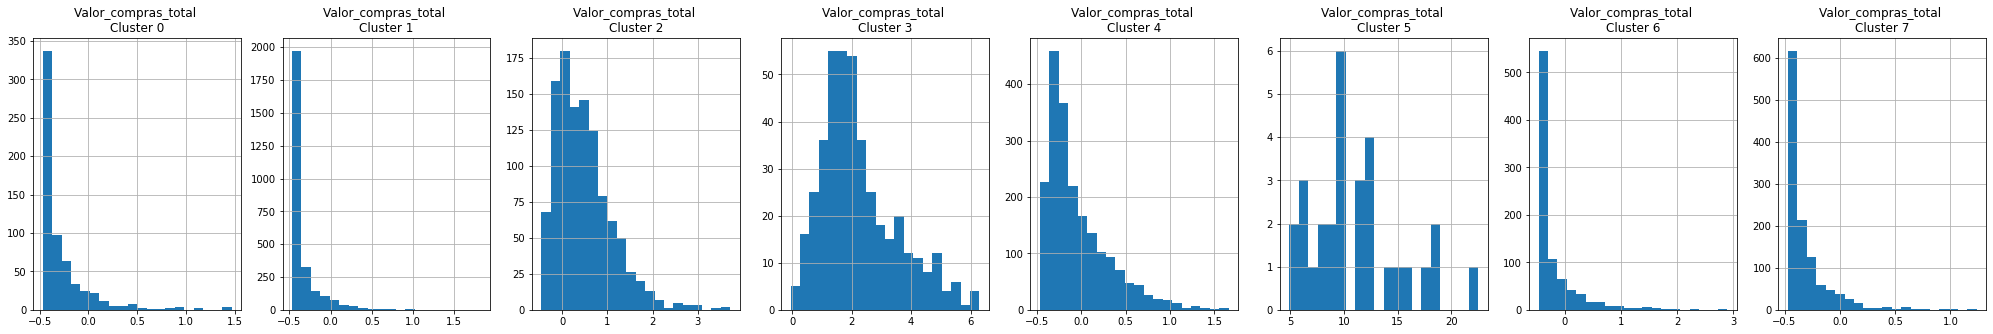

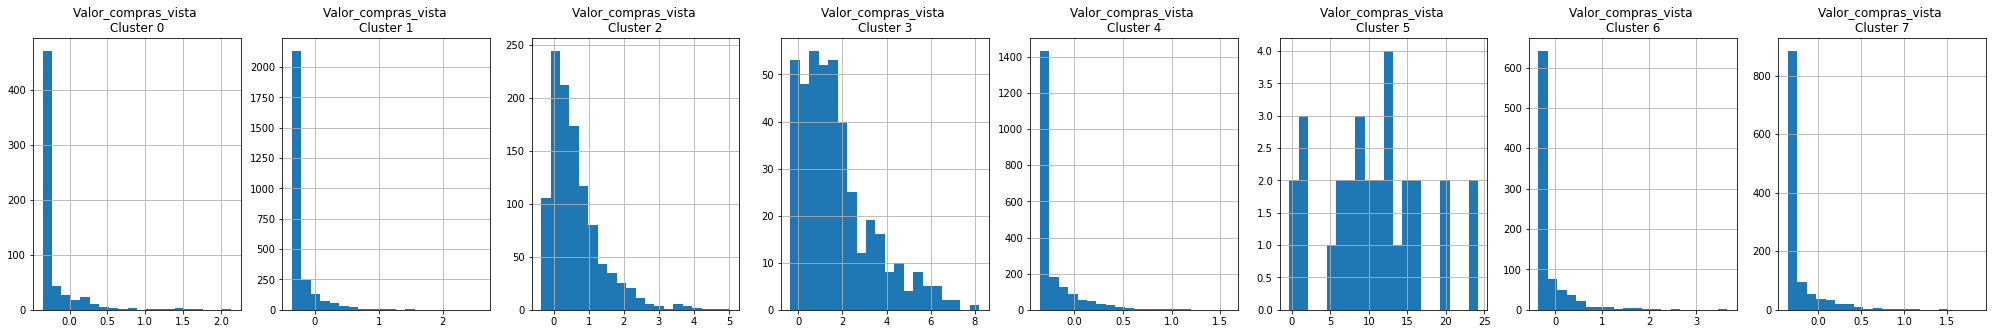

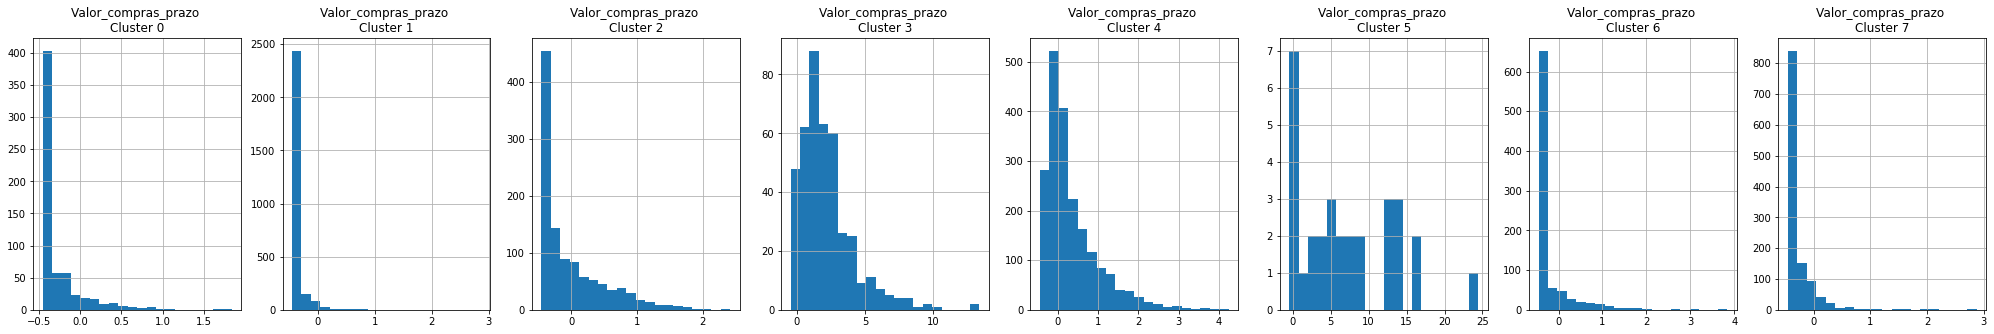

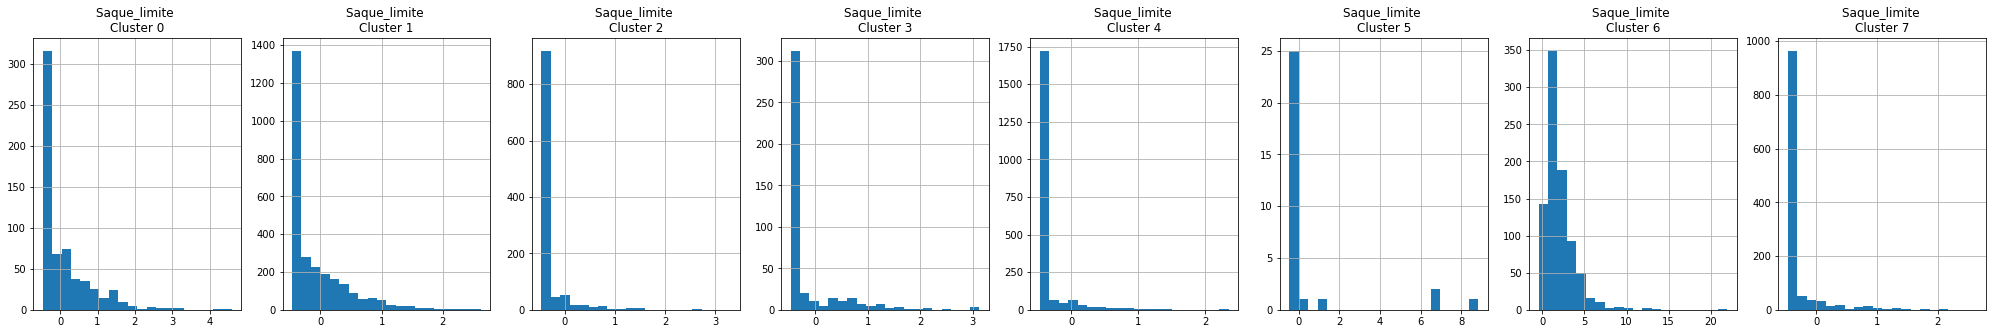

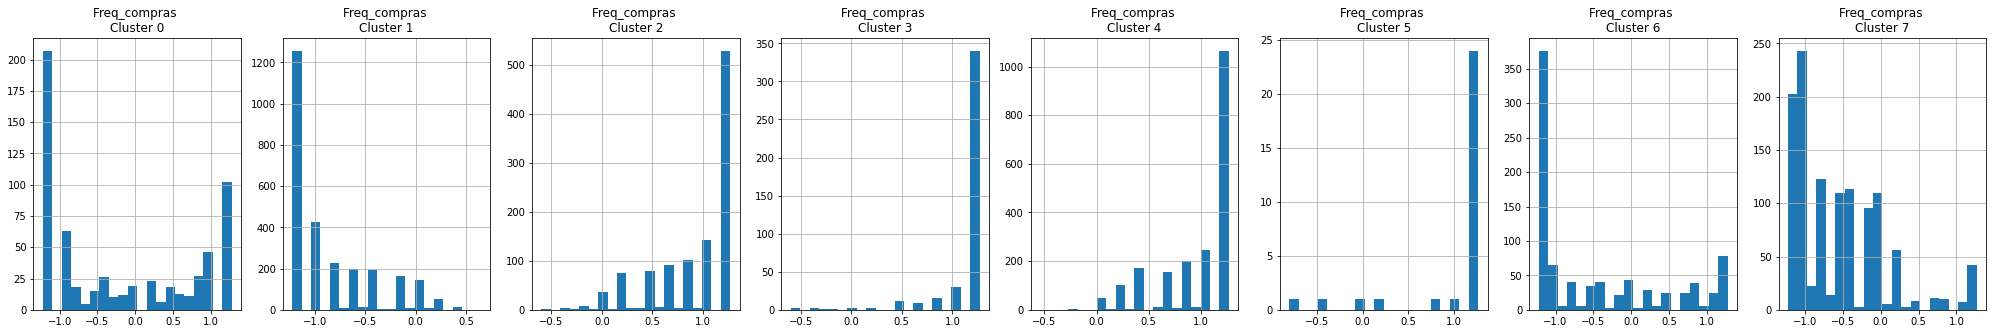

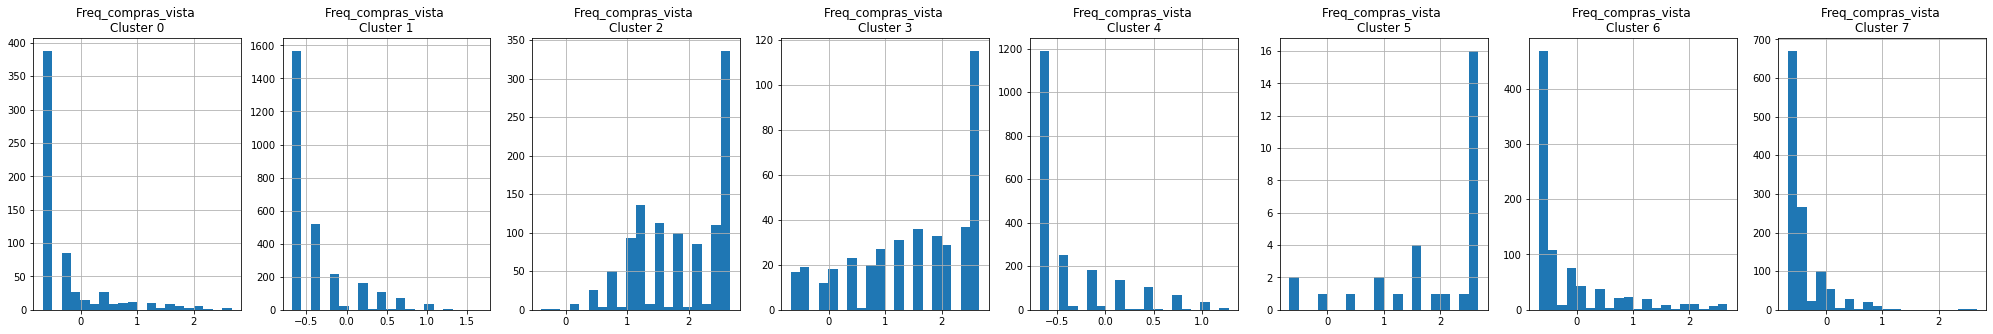

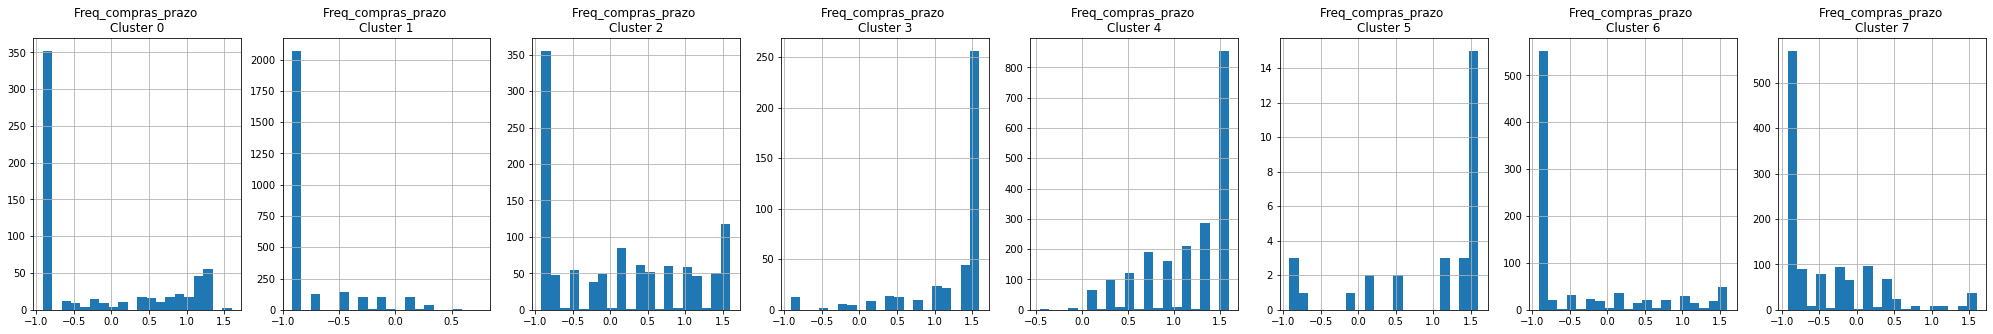

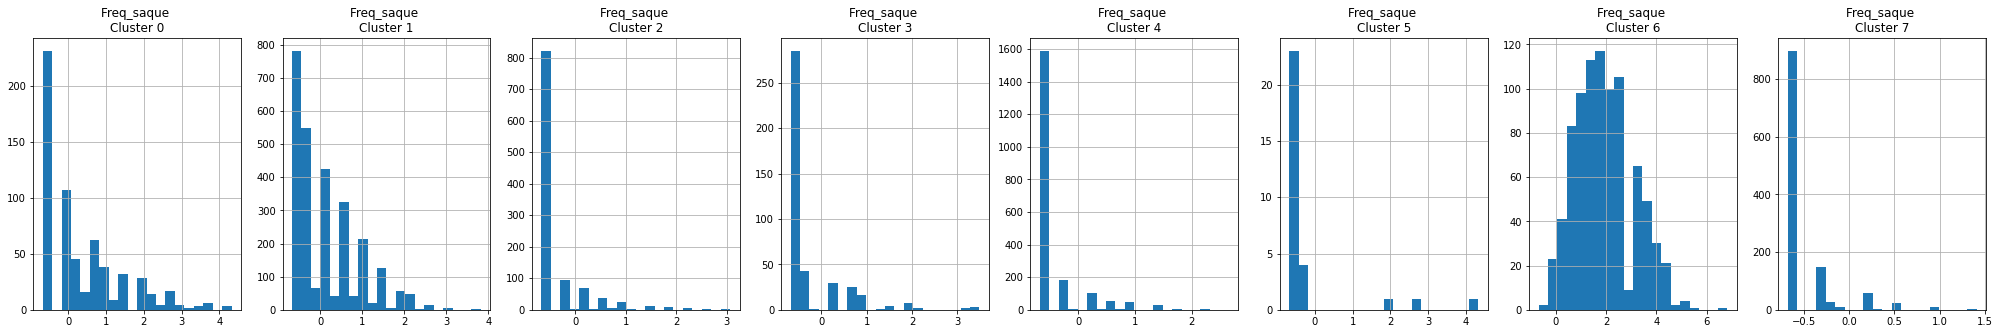

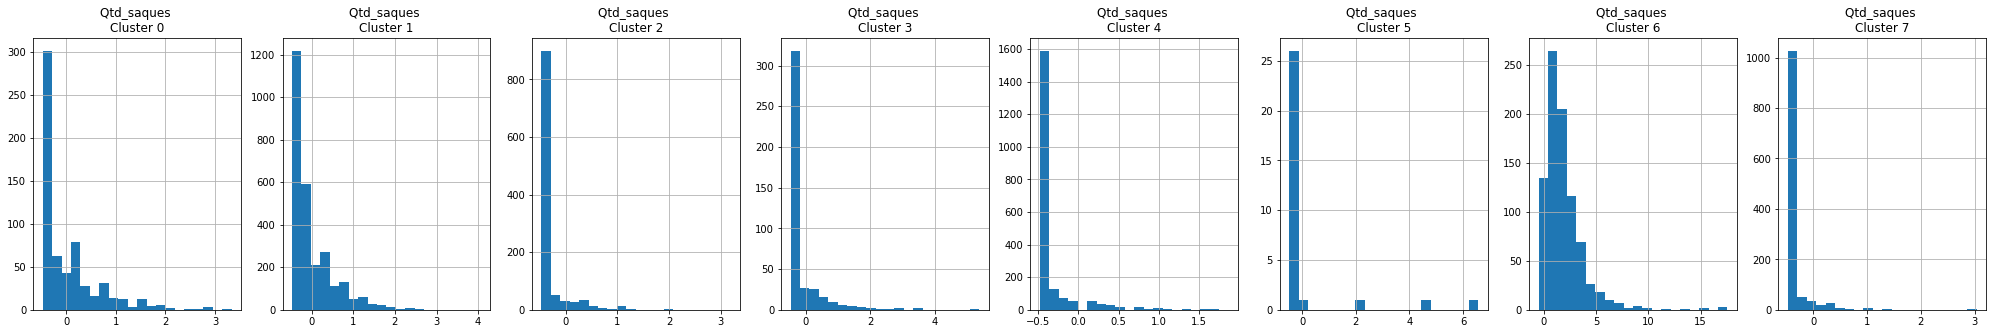

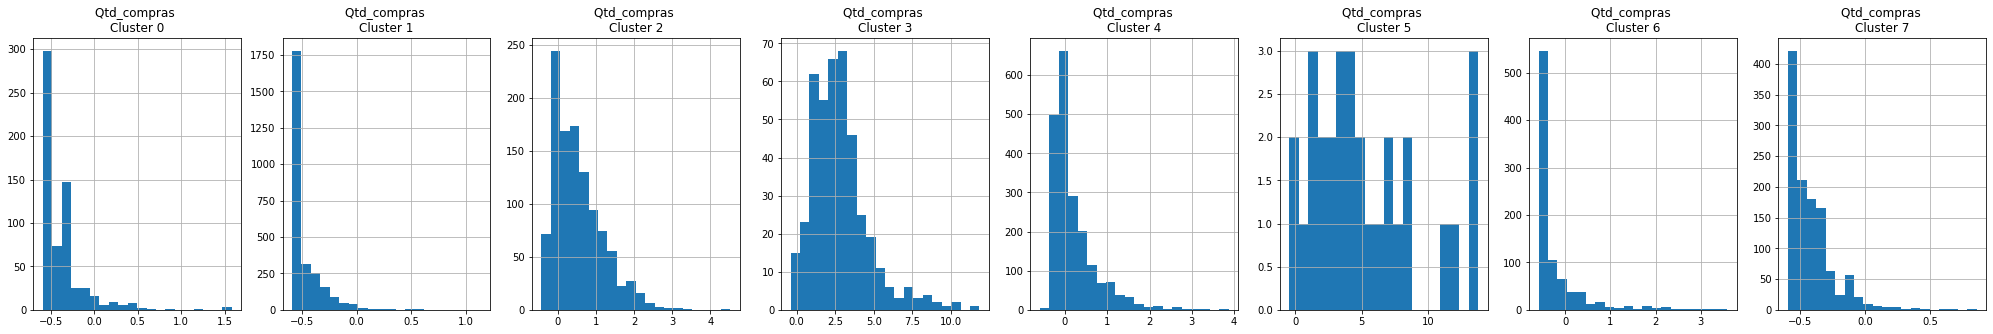

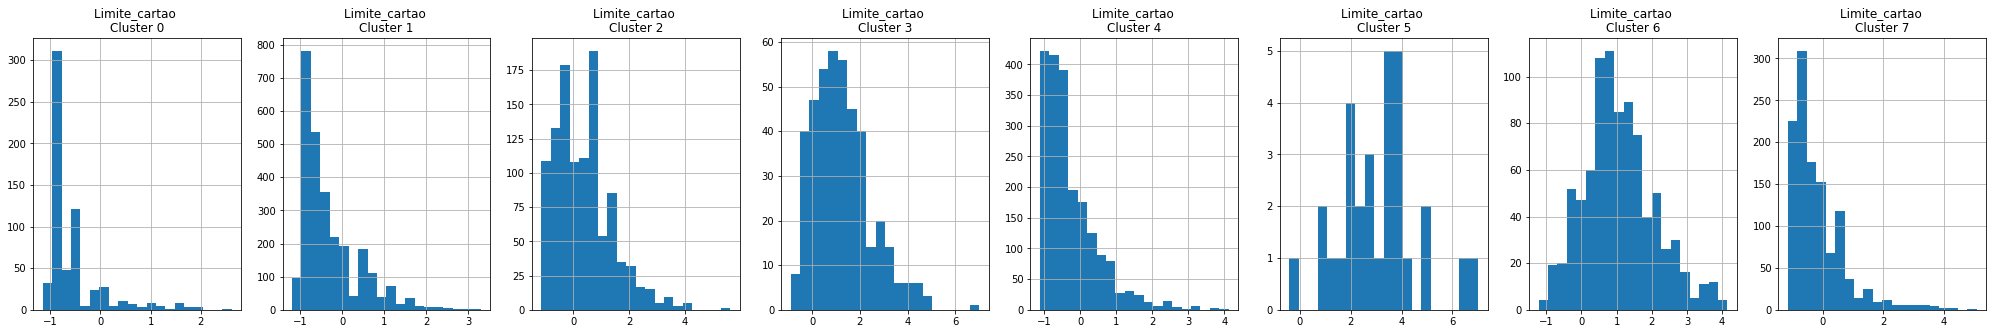

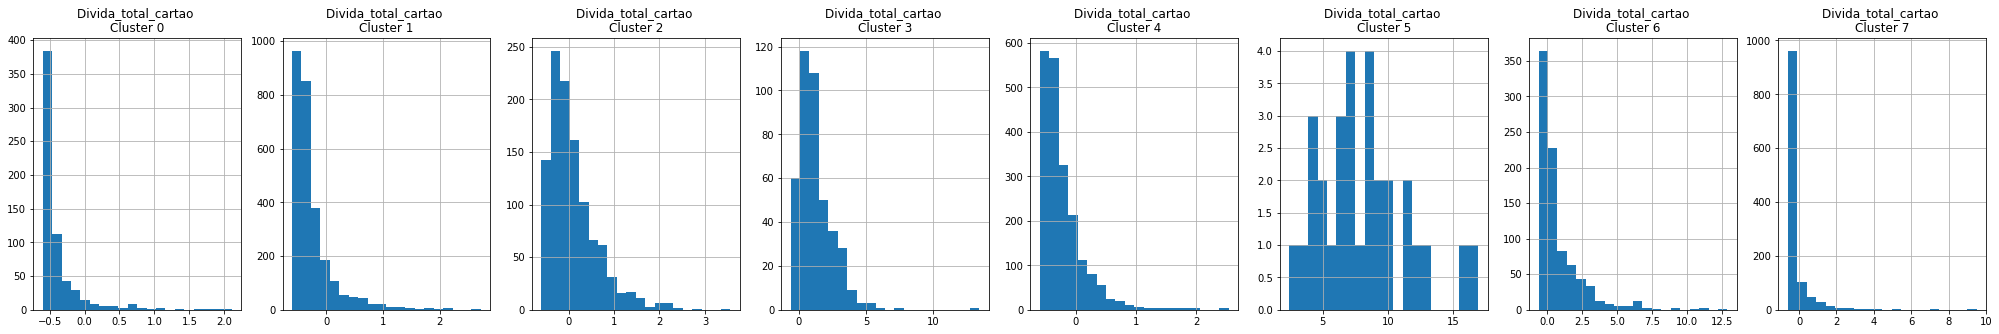

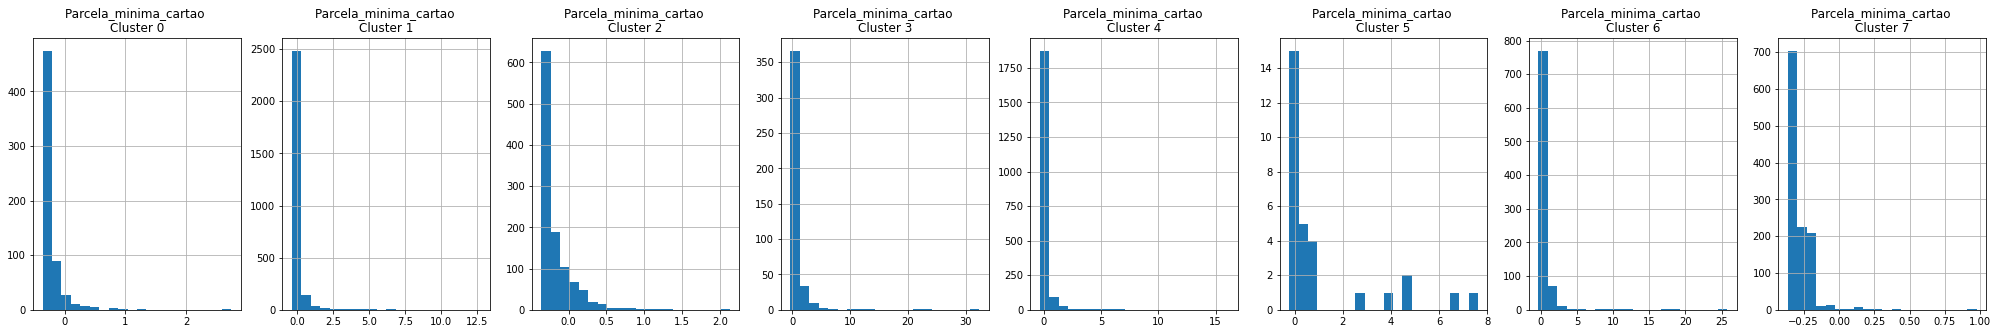

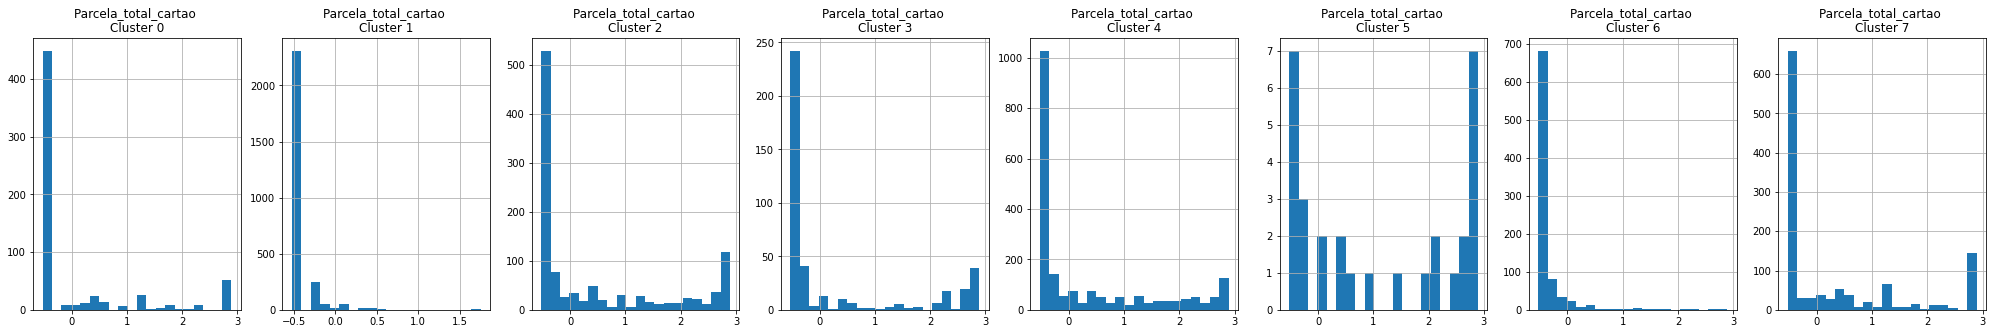

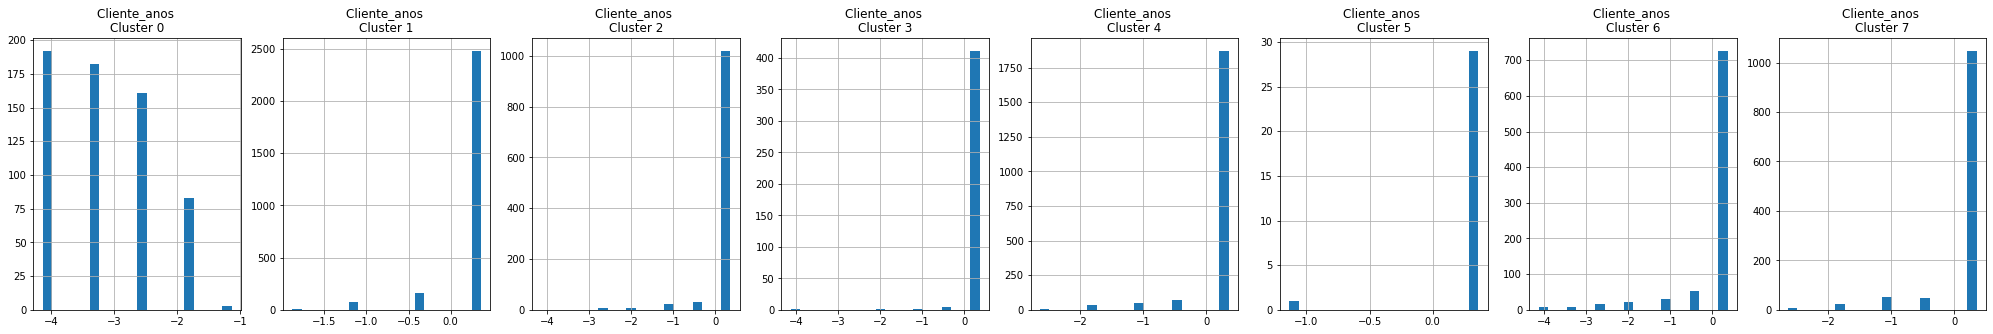

In [36]:
for i in credito.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = credito_cluster[credito_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [37]:
credito_ordenado = credito_cluster.sort_values(by = 'cluster')
credito_ordenado.head()

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos,cluster
8948,-0.572644,-0.889766,0.042092,0.301677,-0.454607,-0.406228,0.439186,1.555959,-0.91709,0.990362,-0.183026,0.333446,-0.905414,-0.576914,-0.324384,-0.525588,-4.126919,0
744,0.005218,-0.009925,-0.469584,-0.356957,-0.454607,0.476302,-1.221928,-0.678716,-0.91709,-0.050673,-0.329554,-0.591841,-0.548135,-0.508632,-0.222778,-0.525588,-2.631099,0
750,0.747847,0.048731,1.467860,2.136940,-0.454607,1.253344,-0.391372,0.438620,-0.91709,0.435143,-0.036497,-0.270002,1.238261,-0.045963,-0.106244,-0.525588,-1.883189,0
753,-0.311906,-0.085340,-0.469584,-0.356957,-0.454607,0.703565,-1.221928,-0.678716,-0.91709,1.466264,0.403089,-0.591841,-0.905414,-0.023596,-0.256260,-0.525588,-3.379009,0
3751,-0.428367,-0.185895,-0.170980,0.027410,-0.454607,0.687795,0.854463,2.114625,-0.91709,2.656023,1.721846,-0.189542,0.963431,-0.325943,-0.282693,-0.525588,-4.126919,0


In [38]:
credito_ordenado.tail()

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos,cluster
1748,-0.744880,-1.785609,-0.414824,-0.356957,-0.325229,-0.466805,-0.391372,-0.678716,-0.288047,-0.675294,-0.476083,-0.430921,0.949689,-0.479109,-0.291898,1.753656,0.360541,7
7394,-0.750771,-2.937401,-0.462423,-0.356957,-0.437688,-0.466805,-1.014290,-0.678716,-0.707409,-0.675294,-0.476083,-0.551611,0.138940,-0.533015,-0.311694,-0.525588,0.360541,7
2766,-0.623004,-1.785609,-0.409208,-0.279240,-0.454607,0.723759,-1.014290,-0.399383,-0.917090,0.573949,-0.036497,-0.551611,2.062751,0.083232,-0.330968,-0.214783,0.360541,7
7439,-0.751704,-3.705263,-0.329174,-0.356957,-0.122869,-0.466805,-1.014290,-0.678716,-0.707409,-0.675294,-0.476083,-0.551611,-0.135890,1.207418,-0.327336,-0.525588,0.360541,7
6103,-0.552193,-1.785609,-0.380031,-0.332858,-0.287256,-0.466805,-0.183732,-0.399383,0.131316,-0.675294,-0.476083,-0.270002,-0.822965,0.598989,0.107063,0.158185,0.360541,7


In [39]:
credito_ordenado.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credito_padronizado)
principal_comp

In [41]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.683768,-1.072569
1,-1.134846,2.508744
2,0.969079,-0.383398
3,-0.888427,0.004373
4,-1.600260,-0.684041


In [42]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683768,-1.072569,1
1,-1.134846,2.508744,6
2,0.969079,-0.383398,2
3,-0.888427,0.004373,1
4,-1.600260,-0.684041,1


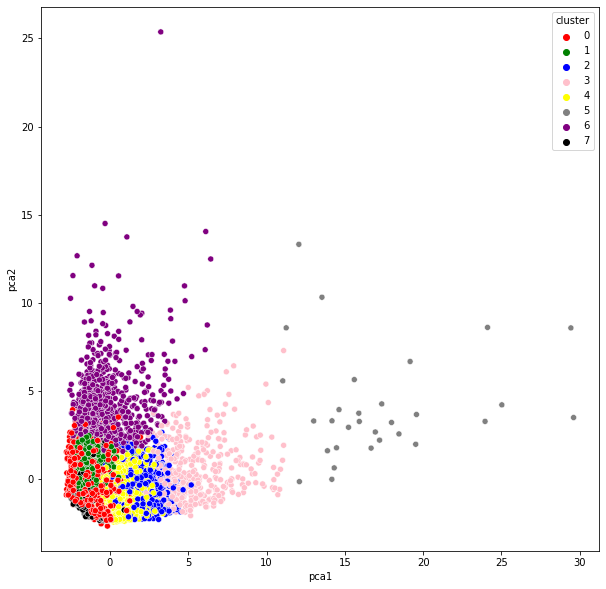

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [ ]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [44]:
credito_padronizado.shape

(8949, 17)

In [45]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [46]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [48]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [49]:
# encoder
encoder = Model(input_df, encoded)

In [50]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [51]:
autoencoder.fit(credito_padronizado, credito_padronizado, epochs = 50)

Epoch 1/50
280/280 [==============================] - 9s 28ms/step - loss: 0.2653
Epoch 2/50
280/280 [==============================] - 10s 35ms/step - loss: 0.1210
Epoch 3/50
280/280 [==============================] - 16s 56ms/step - loss: 0.1157
Epoch 4/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0901
Epoch 5/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0696
Epoch 6/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0792
Epoch 7/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0699
Epoch 8/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0874
Epoch 9/50
280/280 [==============================] - 7s 26ms/step - loss: 0.1118
Epoch 10/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0882
Epoch 11/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0526
Epoch 12/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0502
Epoch 13/50

In [47]:
credito_padronizado.shape

(8949, 17)

In [52]:
compact = encoder.predict(credito_padronizado)

280/280 [==============================] - 1s 5ms/step


In [53]:
compact.shape

(8949, 10)

In [54]:
credito_padronizado[0]

array([-0.73205404, -0.24988139, -0.4249337 , -0.35695651, -0.34911414,
       -0.4668054 , -0.80664908, -0.67871619, -0.70740935, -0.67529446,
       -0.47608293, -0.51138082, -0.96037969, -0.52902627, -0.30242676,
       -0.52558844,  0.36054128])

In [55]:
compact[0]

array([0.        , 0.3367734 , 0.        , 0.9354843 , 0.        ,
       0.43502855, 0.5628473 , 0.        , 1.2485615 , 0.        ],
      dtype=float32)

In [56]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

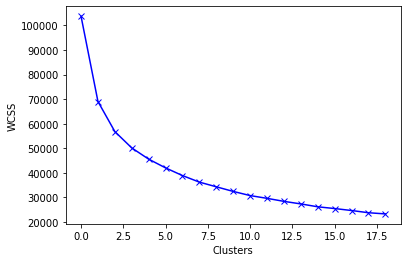

In [57]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

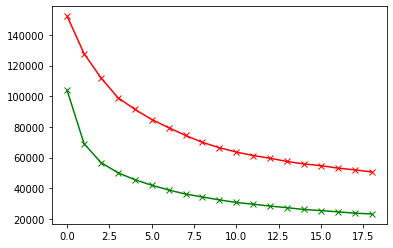

In [58]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [60]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 1, 0, ..., 1, 1, 1], dtype=int32), (8949,))

In [61]:
df_cluster_at = pd.concat([credito, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541,1
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541,2
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541,0


In [62]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.858303,-0.362249
1,4.281198,-1.008907
2,-1.004887,0.365931
3,0.711844,-0.315995
4,-1.685448,-0.340214


In [63]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.858303,-0.362249,0
1,4.281198,-1.008907,1
2,-1.004887,0.365931,0
3,0.711844,-0.315995,2
4,-1.685448,-0.340214,0


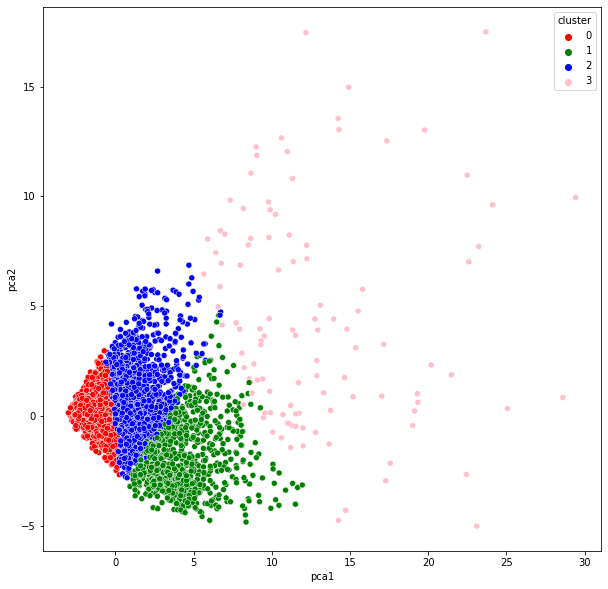

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [65]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541,0
4000,1.508738,0.517980,-0.054033,0.131453,-0.369273,-0.101461,0.231545,0.997289,-0.497727,0.157536,-0.183026,0.011607,0.413771,-0.221608,0.112589,-0.525588,0.360541,0
3998,-0.297769,0.517980,-0.259208,-0.356957,0.042436,-0.466805,1.269742,-0.678716,1.599083,-0.675294,-0.476083,0.132297,-0.960380,-0.376680,-0.149899,-0.525588,0.360541,0
6959,-0.452924,0.517980,-0.201233,-0.082840,-0.323725,-0.466805,-0.599011,-0.399383,-0.497727,-0.675294,-0.476083,-0.430921,-0.932897,-0.296178,-0.263753,-0.525588,0.360541,0
6961,-0.610467,0.517980,-0.448218,-0.329454,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.740516,-0.430836,-0.253833,-0.525588,0.360541,0


In [66]:
df_cluster_ordered.tail()

,Saldo,Freq_atualiza_saldo,Valor_compras_total,Valor_compras_vista,Valor_compras_prazo,Saque_limite,Freq_compras,Freq_compras_vista,Freq_compras_prazo,Freq_saque,Qtd_saques,Qtd_compras,Limite_cartao,Divida_total_cartao,Parcela_minima_cartao,Parcela_total_cartao,Cliente_anos,cluster
898,2.306756,-0.249881,-0.278693,-0.171521,-0.343961,6.603422,-1.014290,-0.399383,-0.707409,0.157536,-0.183026,-0.390691,2.200166,1.377963,0.386648,-0.525588,0.360541,3
4515,2.590350,0.517980,4.913218,1.505237,8.845042,6.749442,1.269742,2.673295,1.599083,4.321680,6.557291,11.798954,2.612411,6.351858,0.330941,0.044224,0.360541,3
1458,-0.749598,-2.553470,-0.408627,-0.356957,-0.286261,-0.466805,-1.014290,-0.678716,-0.707409,-0.675294,-0.476083,-0.591841,2.612411,9.414707,0.105960,1.183844,0.360541,3
883,6.253670,0.517980,-0.469584,-0.356957,-0.454607,10.341105,-1.221928,-0.678716,-0.917090,3.488849,3.919776,-0.591841,3.849146,6.634869,1.967081,-0.525588,0.360541,3
2915,-0.622671,-2.937401,-0.469584,-0.356957,-0.454607,2.215791,-1.221928,-0.678716,-0.917090,-0.258882,-0.329554,-0.591841,1.238261,11.182614,-0.035597,2.893277,0.360541,3


In [67]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
